In [2]:
import pandas as pd
import numpy as np
import random as rnd

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
combine = [train_df,test_df]

# Exploratory data analysis

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Categorical:  Sex, Survived, Embarked, Ordinal: Pclass,
Numerical: Age, Fare, Discrete: SibSp, Parch

Ticket is mix of letters and numbers, Cabin is alpha numeric

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train_df['Name'].nunique() 

891

In [12]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Silvey, Mrs. William Baird (Alice Munger)",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [13]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


/home/weronikadranka/anaconda3/envs/tfseal/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


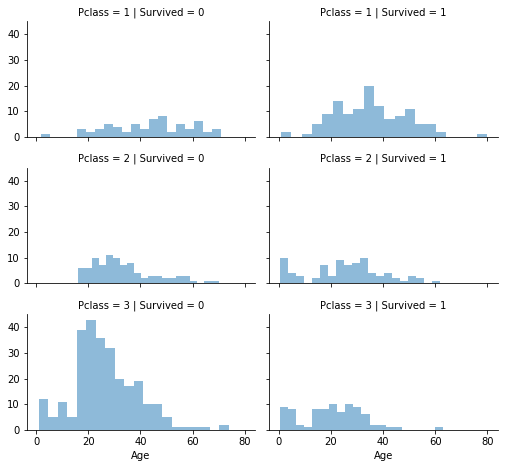

In [15]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

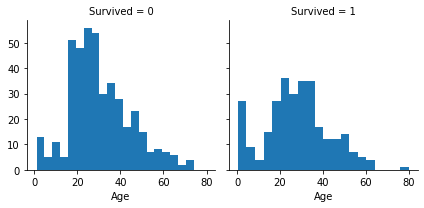

In [16]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [17]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


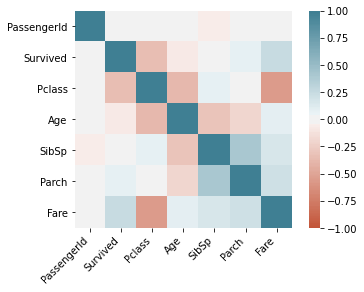

In [18]:
corr = train_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [19]:
pd.qcut(train_df['Fare'], 4)

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [20]:
pd.cut(train_df['Age'], 5) 

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888                 NaN
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

# Crafting functions to prepare data for training

In [21]:
# convert binary categorical variables to numerical
def cuantify_columns(passengers):
    passengers['Sex'] = pd.get_dummies(passengers['Sex'])
    
    return passengers

In [22]:
# delete columns that will not be used for predict
def clean_unnessesary_columns(passengers):
    return passengers.drop(columns=['PassengerId', 'Ticket', 'Cabin'])

In [23]:
# replace NaN values
def clean_nan_values(passengers):
    passengers['Age'] = passengers['Age'].fillna(passengers.groupby(["Sex",'Pclass'])['Age'].transform(lambda x: int(x.median()/0.5 + 0.5 ) * 0.5))
    passengers['Age'] = passengers['Age'].astype(int)

    freq_port = passengers.Embarked.dropna().mode()[0]
    passengers['Embarked'] = passengers['Embarked'].fillna(freq_port)
    passengers['Embarked'] = passengers['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

    passengers['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)

    return passengers

In [24]:
def add_title_feature(passengers):
    passengers['Title'] = passengers.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    passengers = passengers.drop(columns=['Name'])

    passengers['Title'] = passengers['Title'].replace(['Lady', 'Countess','Capt', 
                                              'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    passengers['Title'] = passengers['Title'].replace('Mlle', 'Miss')
    passengers['Title'] = passengers['Title'].replace('Ms', 'Miss')
    passengers['Title'] = passengers['Title'].replace('Mme', 'Mrs')

    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    passengers['Title'] = passengers['Title'].map(title_mapping)
    passengers['Title'] = passengers['Title'].fillna(0)

    return passengers

In [25]:
def split_into_bands(dataset):
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

    return dataset

In [26]:
def add_features(dataset):
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    dataset = dataset.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
    dataset['AgeClass'] = dataset.Age * dataset.Pclass
    
    return dataset

In [27]:
def split_logits_labels(passengers, df_size):
    labels = np.array(passengers['Survived'])
    logits = passengers.drop(columns=['Survived'])
    logits = np.array(logits)

    return logits, labels

def get_trainds():
    passengers = pd.read_csv('train.csv')
    entire_df_size = len(passengers)

    passengers = cuantify_columns(passengers)
    passengers = clean_unnessesary_columns(passengers)
    passengers = clean_nan_values(passengers)	
    passengers = add_title_feature(passengers)
    passengers = split_into_bands(passengers)
    passengers = add_features(passengers)

    return split_logits_labels(passengers, entire_df_size)

def get_testds():
    passengers = pd.read_csv('test.csv')
    labels = pd.read_csv('gender_submission.csv')
    entire_df_size = len(passengers)

    for i in range(0, entire_df_size):
        if passengers.at[i, 'PassengerId'] == labels.at[i, 'PassengerId']:
            passengers.at[i, 'Survived'] = labels.at[i, 'Survived']

    passengers = cuantify_columns(passengers)
    passengers = clean_unnessesary_columns(passengers)
    passengers = clean_nan_values(passengers)
    passengers = add_title_feature(passengers)
    passengers = split_into_bands(passengers)
    passengers = add_features(passengers)

    return split_logits_labels(passengers, entire_df_size)

In [42]:
passengers = pd.read_csv('train.csv')
entire_df_size = len(passengers)

passengers = cuantify_columns(passengers)
passengers = clean_unnessesary_columns(passengers)
passengers = clean_nan_values(passengers)	
passengers = add_title_feature(passengers)
passengers = split_into_bands(passengers)
passengers = add_features(passengers)
passengers.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,AgeClass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [28]:
logits, labels = get_trainds()
test_x, test_y = get_testds()

# Logistic Regression training

In [29]:
#LR with sklearn
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(logits, labels)
Y_pred = logreg.predict(test_x)

In [30]:
#check accuracy on train data
round(logreg.score(logits, labels) * 100, 2)

80.36

In [31]:
#check accuracy on test data
round(logreg.score(test_x, test_y) * 100, 2)

96.41

In [32]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

accuracy_metric(test_y, Y_pred)

96.41148325358851

# Homomorphic encryption part

In [35]:
import tensorflow as tf
import tf_seal as tfs
from tensorflow.python.client import timeline

#normal tensorflow logistic regreession 
def tf_log_reg(data, weights):
    applied_weights = tf.matmul(data, weights)
    return tf.sigmoid(applied_weights)

def sigmoid_on_encrypted_data(x):
    coeffs = np.array([0.5, 0.197, 0.0, -0.004])
    return tfs.poly_eval(x, coeffs)

public_keys, secret_key = tfs.seal_key_gen(gen_relin=True, gen_galois=True)

# encrypted input -> tf_seal.Tensor
input_plain = np.array(logits[0:100]).astype(np.float32)
input_encrypted = tfs.constant(input_plain, secret_key, public_keys)

# public weights taken from previously trained model
public_weights = np.array(logreg.coef_).astype(np.float32).reshape(8,1)

# logistic regression on encrypted data
applied_weights = tfs.matmul(input_encrypted, public_weights.transpose())
tfs_output = sigmoid_on_encrypted_data(applied_weights)

# get answer from tensorflow to compare
tf_output = tf_log_reg(input_plain, public_weights)

with tf.Session() as sess:
    print("TF SEAL Logistic Regression accuracy")
    pred_tfs = np.around(sess.run(tfs_output))
    print(accuracy_metric(labels[0:100], pred_tfs))
    print("Tensorflow Logistic Regression accuracy")
    pred_tf = np.around(sess.run(tf_output))
    print(accuracy_metric(labels[0:100], pred_tf))

TF SEAL Logistic Regression accuracy
80.0
Tensorflow Logistic Regression accuracy
81.0


## The same operations as previously but time measurement added 

In [36]:
public_keys, secret_key = tfs.seal_key_gen(gen_relin=True, gen_galois=True)

# encrypted input -> tf_seal.Tensor
input_plain = np.array(logits[0:100]).astype(np.float32)
input_encrypted = tfs.constant(input_plain, secret_key, public_keys)

# public weights
public_weights = np.array(logreg.coef_).astype(np.float32).reshape(8,1)

applied_weights = tfs.matmul(input_encrypted, public_weights.transpose())
tfs_output = sigmoid_on_encrypted_data(applied_weights)

# get answer from tensorflow to compare
tf_d = tf_log_reg(input_plain, public_weights)

with tf.Session() as sess:
    print("TF SEAL Logistic Regression accuracy")
    run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
    run_metadata = tf.RunMetadata()
    pred_tfs = np.around(sess.run(tfs_output, options=run_options, run_metadata=run_metadata))

    # Create the Timeline object, and write it to a json
    tl = timeline.Timeline(run_metadata.step_stats)
    ctf = tl.generate_chrome_trace_format()
    with open('timeline_tfs.json', 'w') as f:
        f.write(ctf)
    
    print(accuracy_metric(labels[0:100], pred_tfs))
    print("Tensorflow Logistic Regression accuracy")
    run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
    run_metadata = tf.RunMetadata()
    pred_tf = np.around(sess.run(tf_d, options=run_options, run_metadata=run_metadata))

    # Create the Timeline object, and write it to a json
    tl = timeline.Timeline(run_metadata.step_stats)
    ctf = tl.generate_chrome_trace_format()
    with open('timeline.json', 'w') as f:
        f.write(ctf)
        
    print(accuracy_metric(labels[0:100], pred_tf))

TF SEAL Logistic Regression accuracy
80.0
Tensorflow Logistic Regression accuracy
81.0
